# Cancer data ML

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")
from sklearn import preprocessing
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/mortezaabyadeh/Desktop/wdbc.data.csv")

In [5]:
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.columns

Index(['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [18]:
data.shape

(569, 32)

In [11]:
dat = data[['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3']]

In [20]:
dat.shape

(569, 31)

In [21]:
dat["Outcome"] = [0 if each=="B" else 1 for each in dat.Diagnosis]

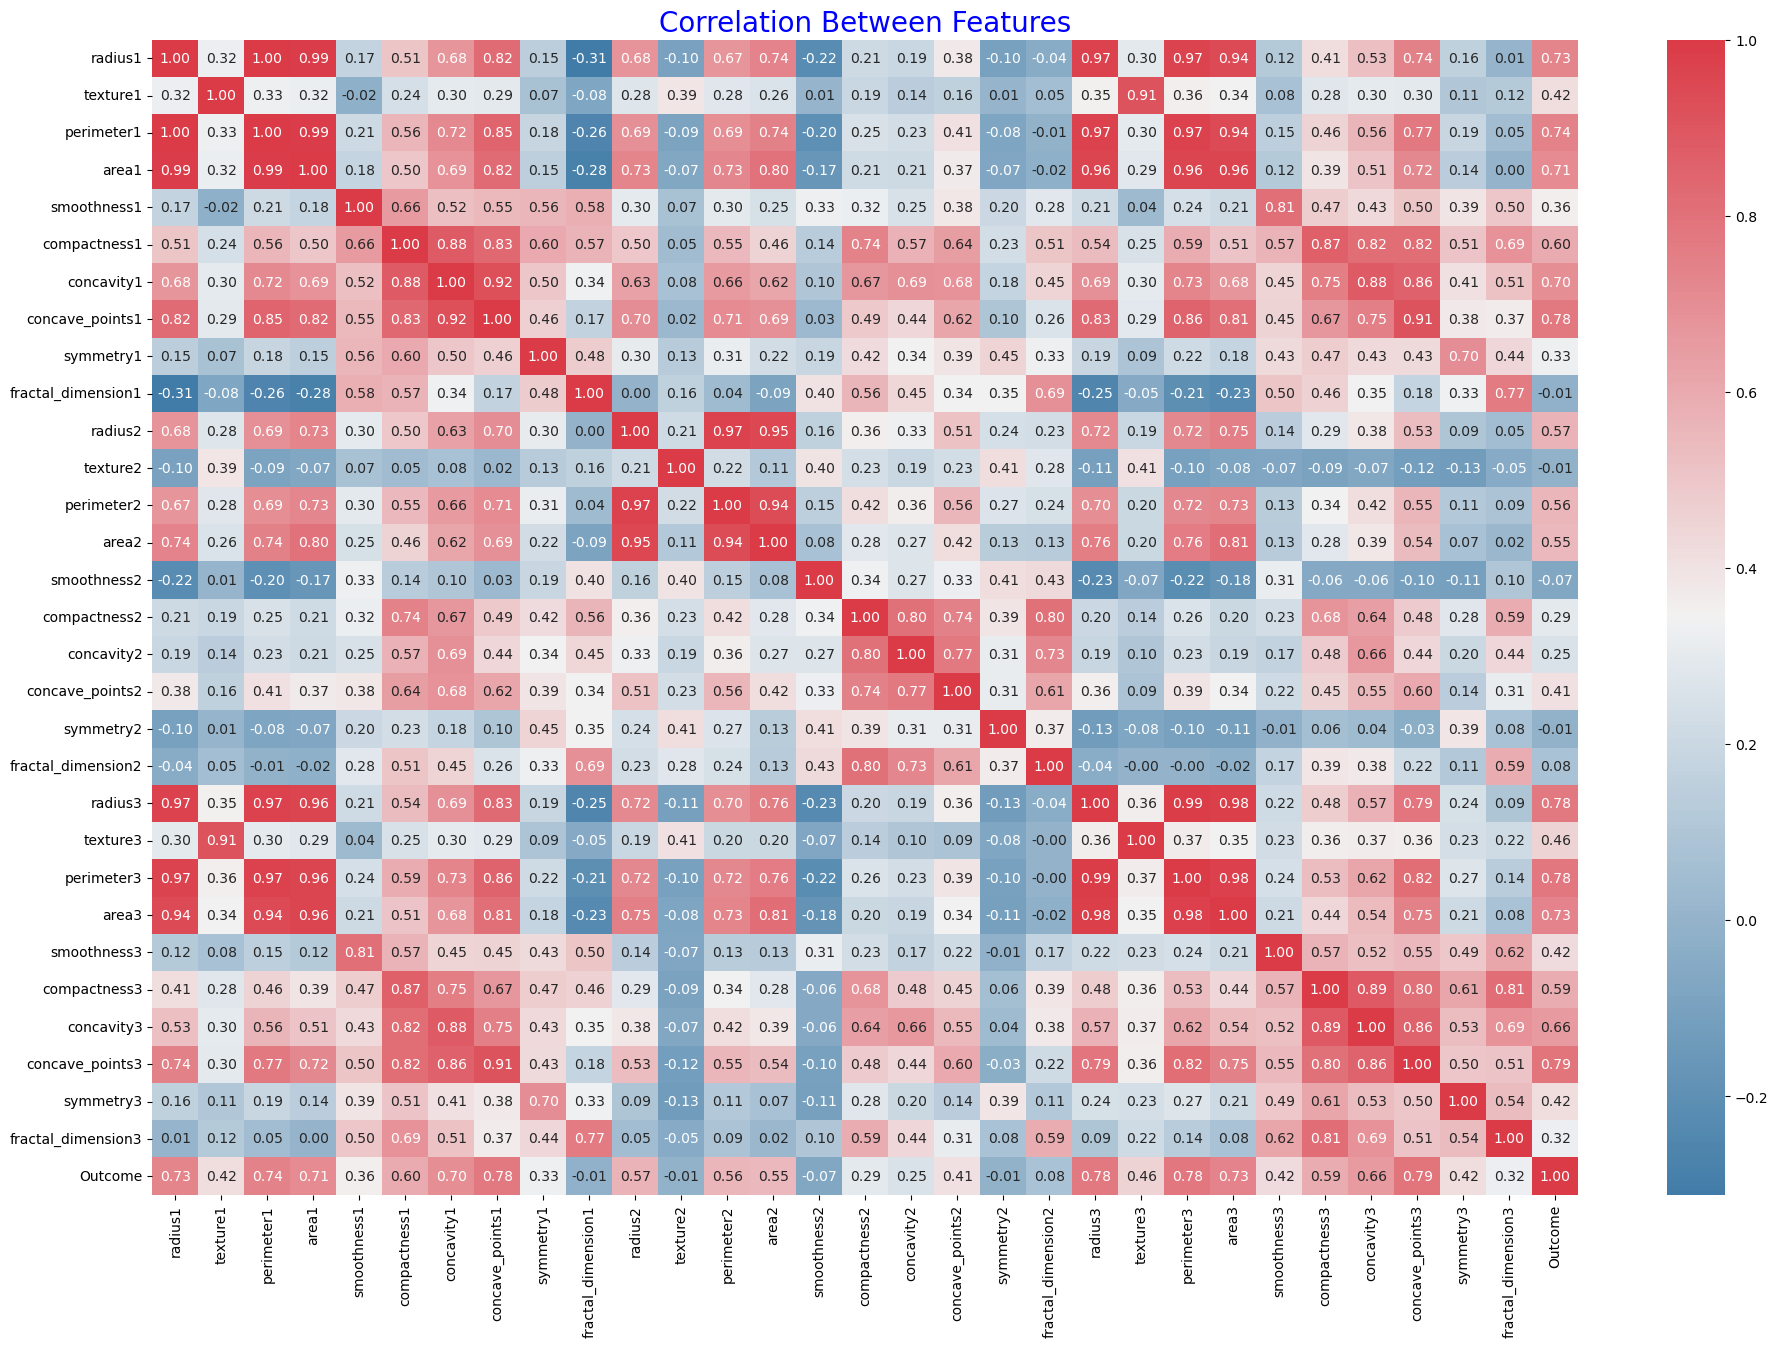

In [22]:
corr = dat.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True)

plt.figure(figsize=(23, 15))

sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap)

plt.title("Correlation Between Features", fontsize=20, color="blue")

plt.show()

In [23]:
missing_values = dat.isnull().sum()
print(missing_values)

Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Outcome               0
dtype: int64


In [24]:
has_na = dat.isna().any().any()

if has_na:
    print("Your dataset has NaN values.")
else:
    print("Your dataset does not have NaN values.")

Your dataset does not have NaN values.


<AxesSubplot:xlabel='concave_points3', ylabel='perimeter3'>

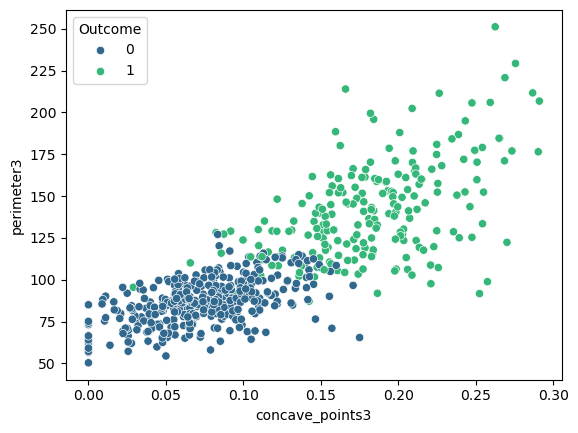

In [26]:
sns.scatterplot(x='concave_points3', y='perimeter3', hue='Outcome', data=dat, palette='viridis')

In [27]:
dat.columns

Index(['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Outcome'],
      dtype='object')

In [28]:
x = dat[['radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3']].values
y = dat[['Outcome']].values

In [29]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [30]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (455, 30) (455, 1)
Test set: (114, 30) (114, 1)


In [31]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94736842, 0.97368421, 0.98245614, 0.98245614, 0.96491228,
       0.97368421, 0.95614035, 0.96491228, 0.97368421])

Mean accuracy for euclidean: [0.94736842 0.97368421 0.98245614 0.98245614 0.96491228 0.97368421
 0.95614035 0.96491228 0.97368421 0.98245614 0.98245614 0.98245614
 0.98245614 0.98245614 0.99122807 0.99122807 0.99122807 0.98245614
 0.98245614]
Mean accuracy for manhattan: [0.94736842 0.97368421 0.96491228 0.95614035 0.95614035 0.95614035
 0.95614035 0.96491228 0.97368421 0.96491228 0.96491228 0.96491228
 0.96491228 0.96491228 0.96491228 0.96491228 0.95614035 0.95614035
 0.95614035]
Mean accuracy for chebyshev: [0.93859649 0.96491228 0.94736842 0.92982456 0.93859649 0.93859649
 0.92982456 0.93859649 0.92982456 0.94736842 0.92982456 0.94736842
 0.95614035 0.95614035 0.94736842 0.94736842 0.94736842 0.95614035
 0.94736842]
Mean accuracy for minkowski: [0.94736842 0.97368421 0.98245614 0.98245614 0.96491228 0.97368421
 0.95614035 0.96491228 0.97368421 0.98245614 0.98245614 0.98245614
 0.98245614 0.98245614 0.99122807 0.99122807 0.99122807 0.98245614
 0.98245614]
Mean accuracy for hamming: [

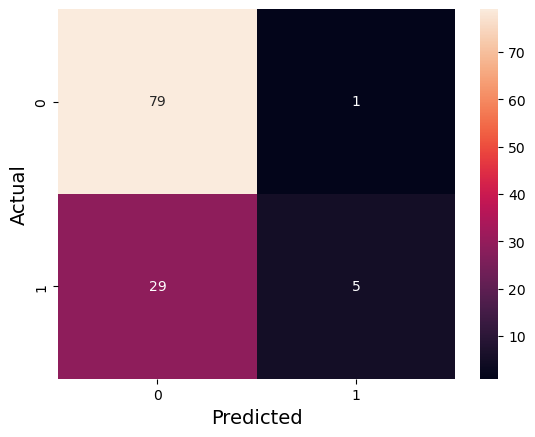

In [40]:
Ks = 20

# Define the list of distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming']

# Initialize arrays to store mean accuracy for each distance metric
mean_acc = np.zeros((len(distance_metrics), Ks-1))

# Iterate over each distance metric
for i, metric in enumerate(distance_metrics):
    for n in range(1, Ks):
        # Train Model and Predict
        neigh = KNeighborsClassifier(n_neighbors=n, metric=metric).fit(x_train, y_train)
        yhat = neigh.predict(x_test)
        mean_acc[i, n-1] = metrics.accuracy_score(y_test, yhat)

# Print the mean accuracy for each distance metric
for i, metric in enumerate(distance_metrics):
    print(f"Mean accuracy for {metric}: {mean_acc[i]}")


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       0.97      1.00      0.99        33

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



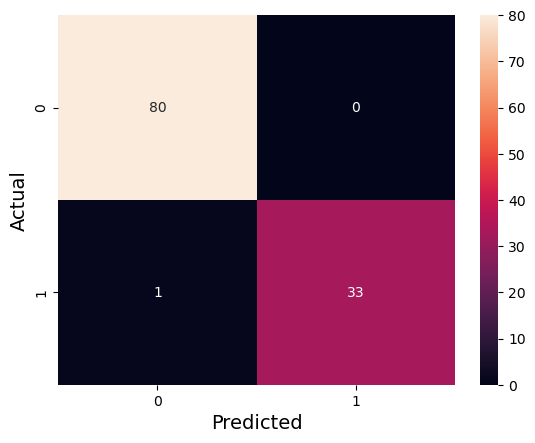

In [41]:
k = 16
neigh = KNeighborsClassifier(n_neighbors = k,metric="minkowski").fit(x_train,y_train)
neigh
yhat = neigh.predict(x_test)
yhat[0:5]
print(classification_report(yhat,y_test))

cm = confusion_matrix(y_test, yhat)

sns.heatmap(cm, annot=True, fmt=".0f")

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

plt.show()

In [35]:

from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [36]:
models = [LogisticRegression(random_state=42),KNeighborsClassifier(),
          SVC(probability=True, random_state=42),GaussianNB(),
          DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),xgb.XGBClassifier(),AdaBoostClassifier()]
model_names = ['LogisticRegression','KNN','SVM','NaiveBayes','DecisionTree','RandomForest','XGBoost','AdaBoostClassifier']
auc_scores = []

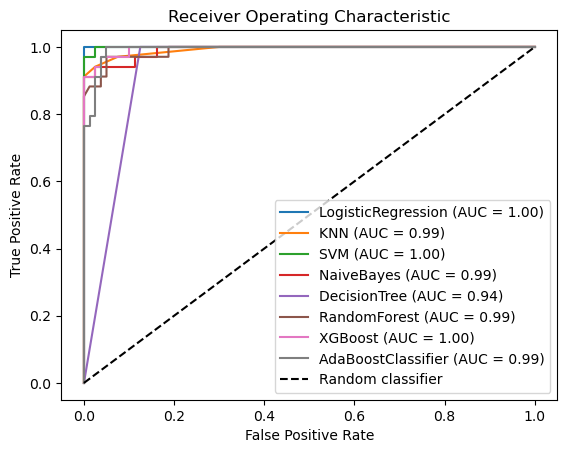

In [37]:
for model,name in zip(models,model_names): 
    model.fit(x_train,y_train)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
    auc_score = auc(fpr,tpr)
    auc_scores.append(auc_score)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, auc_score))
    
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1_scores = []
recall = []
precision = []

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    r = recall_score(y_test,y_pred)
    p = precision_score(y_test,y_pred)
    f1_scores.append(f1)
    recall.append(r)
    precision.append(p)
    print('%s: F1-score = %0.3f' % (name, f1))
    print('%s: Precision = %0.3f' % (name, p))
    print('%s: Recall = %0.3f' % (name, r))
    print('\n')
    



average_f1_score = sum(f1_scores) / len(f1_scores)
print('Average F1-score:', average_f1_score)


LogisticRegression: F1-score = 0.944
LogisticRegression: Precision = 0.895
LogisticRegression: Recall = 1.000


KNN: F1-score = 0.941
KNN: Precision = 0.941
KNN: Recall = 0.941


SVM: F1-score = 0.958
SVM: Precision = 0.919
SVM: Recall = 1.000


NaiveBayes: F1-score = 0.877
NaiveBayes: Precision = 0.821
NaiveBayes: Recall = 0.941


DecisionTree: F1-score = 0.872
DecisionTree: Precision = 0.773
DecisionTree: Recall = 1.000


RandomForest: F1-score = 0.880
RandomForest: Precision = 0.805
RandomForest: Recall = 0.971


XGBoost: F1-score = 0.930
XGBoost: Precision = 0.892
XGBoost: Recall = 0.971


AdaBoostClassifier: F1-score = 0.930
AdaBoostClassifier: Precision = 0.892
AdaBoostClassifier: Recall = 0.971


Average F1-score: 0.9163786905056723


In [42]:
from sklearn.model_selection import GridSearchCV

SVM = SVC()

C = [0.1,1,10,100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

params = {'C':C,'kernel':kernel}

SVM_grid = GridSearchCV(estimator = SVM,param_grid = params,refit= True,verbose = 0,n_jobs=-1)
SVM_grid.fit(x_train,y_train.ravel())
print(f"best parameters : {SVM_grid.best_params_}")
print(f"best score : {SVM_grid.best_score_}")

best parameters : {'C': 0.1, 'kernel': 'linear'}
best score : 0.9758241758241759


In [45]:
LogReg = LogisticRegression(solver='liblinear' , C = 0.1 , penalty = 'l2')
LogReg.fit(x_train,y_train.ravel())
y_pred = LogReg.predict(x_test)

print(f"accuracy  : {metrics.accuracy_score(y_test,y_pred)} \n")
print(f"f1 score  : {metrics.f1_score(y_test,y_pred)} \n")
print(f"classification report :\n {metrics.classification_report(y_test,y_pred)} \n")

accuracy  : 0.9824561403508771 

f1 score  : 0.9714285714285714 

classification report :
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        80
           1       0.94      1.00      0.97        34

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114
 



              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       0.97      1.00      0.99        33

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



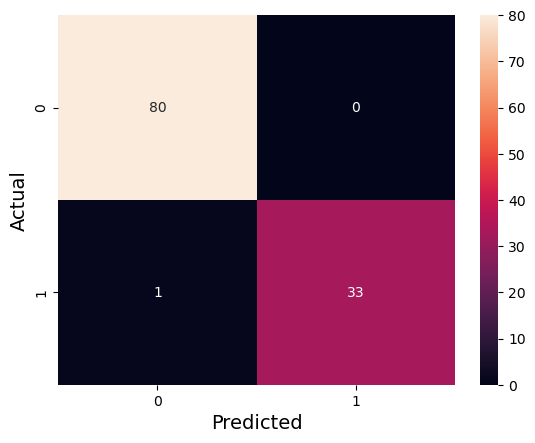

In [47]:
k = 16
neigh = KNeighborsClassifier(n_neighbors = k,metric="minkowski").fit(x_train,y_train)
neigh
yhat = neigh.predict(x_test)
yhat[0:5]
print(classification_report(yhat,y_test))

cm = confusion_matrix(y_test, yhat)

sns.heatmap(cm, annot=True, fmt=".0f")

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

plt.show()